## Мини проект п.3.4

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
user_data = pd.read_csv('user_data.csv')

In [3]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
user_data.describe

<bound method NDFrame.describe of       client  premium  age
0      46346    False   58
1       4391    False   55
2      27372    False   64
3      11989    False   44
4      60664    False   49
...      ...      ...  ...
2949   19411    False   29
2950   61579    False   50
2951   61221     True   64
2952   29863    False   46
2953   78499    False   36

[2954 rows x 3 columns]>

In [5]:
logs = pd.read_csv('logs.csv')

In [6]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [7]:
logs.describe

<bound method NDFrame.describe of       client  success  platform        time
0      40177     True     phone  1585412212
1      61468     True     phone  1585425658
2      35604    False     phone  1585459894
3       9961     True     phone  1585400189
4      10931     True  computer  1585468629
...      ...      ...       ...         ...
4495   64496    False  computer  1585459072
4496   73299     True     phone  1585458370
4497    8967     True     phone  1585465121
4498   52880    False     phone  1585455362
4499   40921     True     phone  1585437692

[4500 rows x 4 columns]>

### Сколько уникальных значений принимает переменная platform?

In [8]:
logs.platform.nunique() #

3

### Какой клиент совершил больше всего успешных операций? (success == True)

In [9]:
logs.query('success == True').groupby('client').agg({'success': 'count'}).sort_values(['success', 'client'], ascending=[False, True]).head(10)

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


### С какой платформы было совершено наибольшее количество успешных операций?

In [10]:
logs.query('success == True').groupby('platform').agg({'success': 'count'}).sort_values('success', ascending=False)

,success
platform,
phone,2019
computer,1090
tablet,180


### Какую платформу предпочитают премиальные клиенты?

In [11]:
premium_clients = user_data.query('premium == True') # клиенты только с премиумом

In [12]:
premium_clients.merge(logs, on='client') \
                .query('success == True') \
                .groupby('platform') \
                .agg({'success': 'count'}) \
                .sort_values('success', ascending=False)

,success
platform,
phone,177
computer,108
tablet,18


### Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

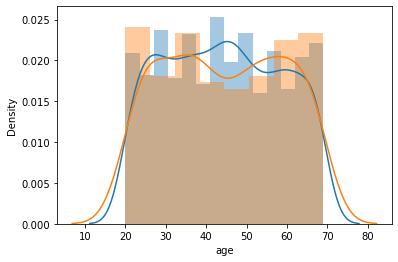

In [13]:
sns.distplot(user_data.query('premium == False').age)
sns.distplot(user_data.query('premium == True').age)

### Постройте график распределения числа успешных операций: 

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

<AxesSubplot:xlabel='success', ylabel='Count'>

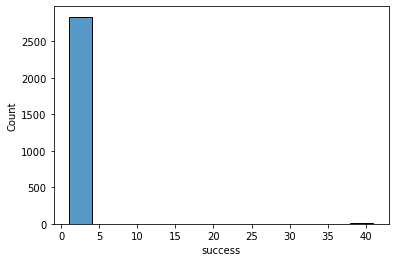

In [14]:
sns.histplot(logs.query('success == True').groupby('client').agg({'success': 'count'}).success)

### Клиенты какого возраста совершили наибольшее количество успешных действий?
##### Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций. Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [15]:
df = user_data.merge(logs, on='client')
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [16]:
successed_age_df = df.query("platform == 'computer' and success == True") \
                    .groupby('age', as_index=False) \
                    .agg({'success': 'count'}) \
                    .sort_values('success')
successed_age_df

,age,success
33,53,5
36,56,6
2,22,8
10,30,8
35,55,9
46,66,9
21,41,10
14,34,10
25,45,11
19,39,11


<AxesSubplot:xlabel='age', ylabel='success'>

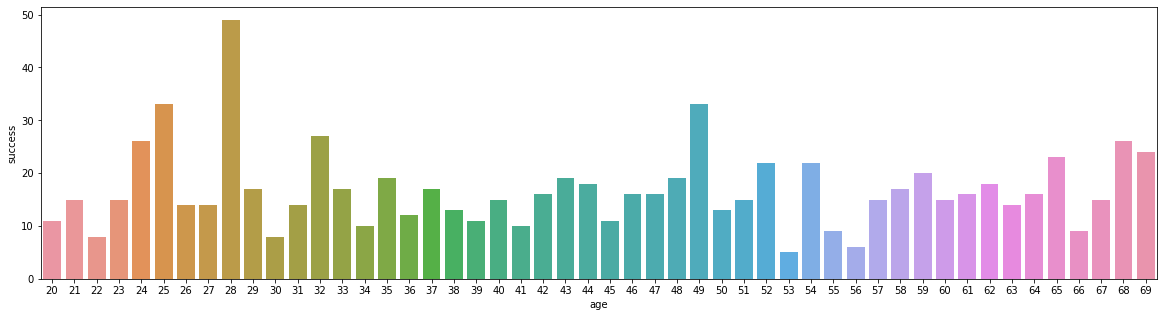

In [17]:
plt.figure(figsize=(20, 5)) # размер графика!!!
sns.barplot(x=successed_age_df.age, y=successed_age_df.success)

<AxesSubplot:xlabel='age', ylabel='success'>

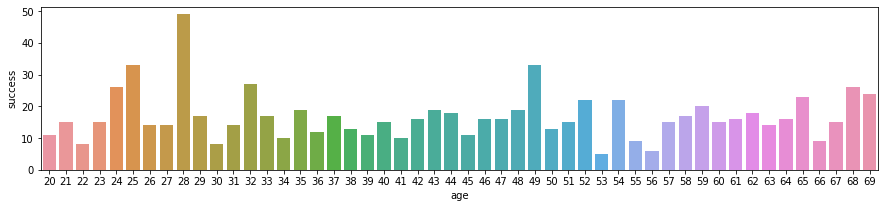

In [18]:
plt.figure(figsize=(15, 3)) # размер графика!!!
sns.barplot(x='age', y='success', data=successed_age_df) # другой способ построить график

### Еще один способ построить подобный график

In [19]:
computer_success = df.query("platform == 'computer' and success == True")
computer_success

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='count'>

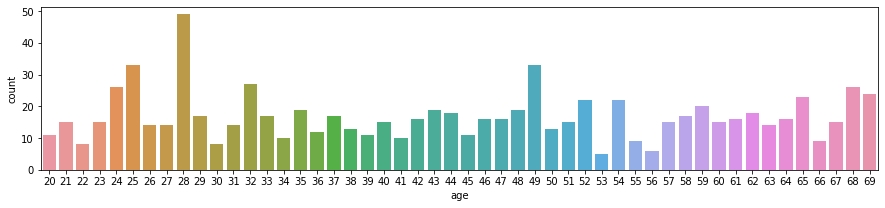

In [20]:
plt.figure(figsize=(15, 3))
sns.countplot(computer_success.age)